# Assignment 9

Please add the name, first name, immatriculation number and study program below. Each member of the group has to be added:

- Name: , First Name: , matr. number: , study program:.
- Name:, First Name:, matr. number:, study program:.
- Name:, First Name:, matr. number:, study program:.


In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

from svm_helper import *

np.random.seed(42)

## Task 3: Linear SVM


Dataset shape: (100, 4)
Number of samples: 100
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class distribution: [50 50]


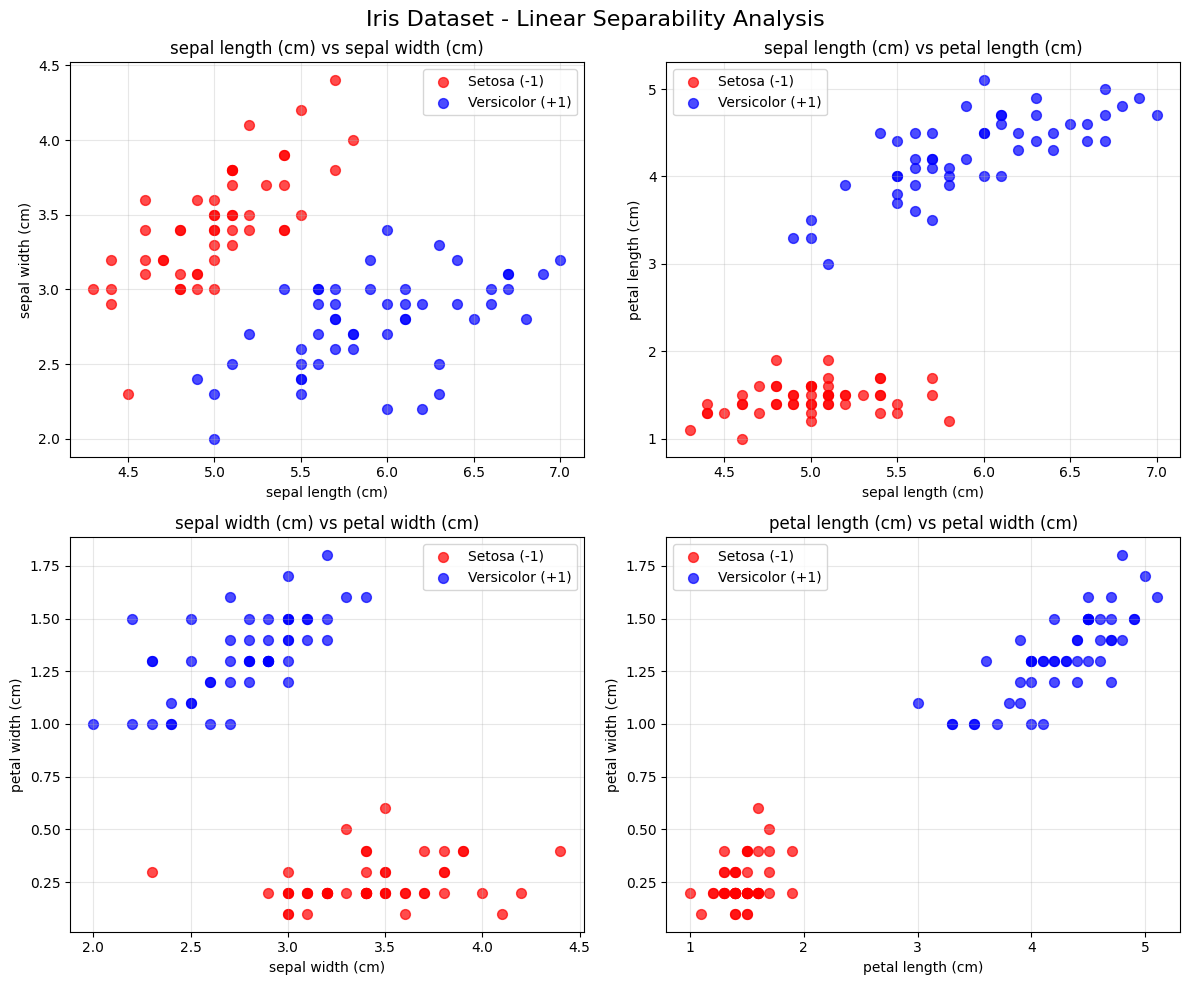

In [2]:
X_iris, y_iris, feature_names_iris = load_and_explore_iris_data()
explore_iris_dataset(X_iris, y_iris, feature_names_iris)

In [3]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris, scaler_iris = preprocess_iris_data(X_iris, y_iris)

Training set shape: (80, 4)
Test set shape: (20, 4)
Training labels distribution (-1, +1): (array([-1,  1]), array([40, 40]))
Test labels distribution (-1, +1): (array([-1,  1]), array([10, 10]))


In [4]:
class LinearKernel:
    @staticmethod
    def compute(x1, x2):
        """
        Linear kernel: K(x1, x2) = x1^T * x2
        """
        # TODO: Implement linear kernel

In [ ]:
class LinearSVM:
    """
    Linear Support Vector Machine implementation from scratch.
    """
    
    def __init__(self, C=1.0, learning_rate=0.01, n_epochs=1000, tolerance=1e-6):
        """
        Initialize Linear SVM classifier.
        
        Args:
            C: Regularization parameter
            learning_rate: Learning rate for gradient descent
            n_epochs: Maximum number of training epochs
            tolerance: Convergence tolerance
        """
        self.C = C
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.tolerance = tolerance
        
        # Initialize parameters
        self.alpha = None
        self.b = 0
        self.X_train = None
        self.y_train = None
        self.support_vectors = None
        self.support_vector_labels = None
        self.support_vector_alphas = None
        self.kernel_func = LinearKernel.compute
    
    def fit(self, X, y):
        """
        Train the Linear SVM using gradient descent on the dual problem.
        """
        self.X_train = X
        self.y_train = y
        n_samples = X.shape[0]
        
        # Initialize alpha values
        self.alpha = np.random.uniform(0, self.C, n_samples)
        
        # TODO: Compute kernel matrix
        
        
        # Gradient descent
        for epoch in range(self.n_epochs):
            alpha_prev = self.alpha.copy()
            
            # Compute gradients
            gradients = np.ones(n_samples) - np.sum(
                self.alpha * y * K * y.reshape(-1, 1), axis=0
            )
            
            # TODO: Update alpha values
            
            # Apply constraints
            self.alpha = np.clip(self.alpha, 0, self.C)
            
            # Check convergence
            if np.linalg.norm(self.alpha - alpha_prev) < self.tolerance:
                print(f"Linear SVM converged after {epoch + 1} epochs")
                break
        
        # Compute bias term b
        self._compute_bias()
        
        # Identify support vectors
        self._identify_support_vectors()
    
    def _compute_bias(self):
        """Compute the bias term b using support vectors."""
        # TODO: Find indices where alpha is between 1e-8 and C - 1e-8
        sv_indices = 
        
        if len(sv_indices) > 0:
            # TODO: Compute the kernel matrix for the support vectors
            K_sv = 
            # TODO: Compute the decision values for the support vectors
            decision_values =
            self.b = np.mean(self.y_train[sv_indices] - decision_values)
        else:
            print("Warning: No support vectors found on the margin for bias calculation. Bias set to 0.")
            self.b = 0
    
    def _identify_support_vectors(self):
        """Identify support vectors (alpha > threshold)."""
        # TODO: Find indices where alpha is greater than 1e-8 and store them in sv_indices
        sv_indices =
        
        self.support_vectors = self.X_train[sv_indices]
        self.support_vector_labels = self.y_train[sv_indices]
        self.support_vector_alphas = self.alpha[sv_indices]
        
        if len(self.X_train) > 0:
            print(f"Number of support vectors: {len(sv_indices)}")
            print(f"Support vector ratio: {len(sv_indices) / len(self.X_train):.2%}")
        else:
            print("No training data to identify support vectors from.")
    
    def decision_function(self, X):
        """Compute the decision function for samples."""
        if self.X_train is None or self.alpha is None:
            raise RuntimeError("SVM model not trained yet. Call fit() first.")
        # TODO: Compute the decision function using the kernel trick
        K = self.kernel_func(, )

        # TODO: Use the kernel trick: f(x) = sum(alpha_i * y_i * K(x, x_i)) + b
        decision = 

        return decision
    
    def predict(self, X):
        """Make predictions on new data."""
        # TODO: Use decision_function and apply sign
        decision_values = 
        # TODO: Return the sign of the decision values
        

SyntaxError: invalid syntax (3571044042.py, line 79)

In [ ]:
def train_and_evaluate_linear_svm(X_train, X_test, y_train, y_test):
    """
    Train Linear SVM and evaluate its performance.
    """
    print("Training Linear SVM")
    
    # TODO:Create and fit SVM (linear_rate = 0.001, n_epochs = 2000)
    svm = 
    svm.fit(, )
    
    # TODO: Make predictions
    y_train_pred = 
    y_test_pred = 
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # END SAMPLE SOLUTION
    print(f"Training Accuracy (Linear SVM): {train_accuracy:.4f}")
    print(f"Test Accuracy (Linear SVM): {test_accuracy:.4f}")
    print("\nClassification Report (Linear SVM):")
    print(classification_report(y_test, y_test_pred, target_names=['Setosa', 'Versicolor'], zero_division=0))
    
    return svm, y_test_pred

linear_svm_model, y_pred_iris = train_and_evaluate_linear_svm(X_train_iris, X_test_iris, y_train_iris, y_test_iris)

In [ ]:
# Create 2D SVM for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_train_iris)
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.3f}")

svm_2d = LinearSVM(C=linear_svm_model.C, learning_rate=0.001, n_epochs=2000)
svm_2d.fit(X_2d, y_train_iris)

plot_linear_svm_boundary(svm_2d, X_2d, y_train_iris, feature_names_iris)

So, are Linear SVMs enough? Let's see what happens when we apply Linear SVM to non-linearly separable data,

In [ ]:
def demonstrate_linear_svm_limitation():
    """
    Demonstrate that Linear SVM cannot handle non-linearly separable data.
    """
    # Get the XOR-like data
    X_xor, y_xor = create_simple_nonlinear_example()
    
    # Standardize and split data
    scaler = StandardScaler()
    X_xor_scaled = scaler.fit_transform(X_xor)
    X_train_xor, X_test_xor, y_train_xor, y_test_xor = train_test_split(
        X_xor_scaled, y_xor, test_size=0.3, random_state=42, stratify=y_xor
    )
    
    # Train Linear SVM on XOR data
    print("Training Linear SVM on XOR-like data...")
    # TODO: Create and fit LinearSVM (C=1.0, learning_rate=0.01, n_epochs=1000, tolerance=1e-6)
    linear_svm_xor = 
    
    # Evaluate performance
    y_pred_xor_train = linear_svm_xor.predict(X_train_xor)
    y_pred_xor_test = linear_svm_xor.predict(X_test_xor)
    
    train_accuracy_xor = accuracy_score(y_train_xor, y_pred_xor_train)
    test_accuracy_xor = accuracy_score(y_test_xor, y_pred_xor_test)
    
    print(f"Linear SVM Training Accuracy on XOR data: {train_accuracy_xor:.3f}")
    print(f"Linear SVM Test Accuracy on XOR data: {test_accuracy_xor:.3f}")
    
    return X_xor_scaled, y_xor, linear_svm_xor

In [ ]:
X_xor_data, y_xor_data, failed_svm_model = demonstrate_linear_svm_limitation()
visualize_linear_svm_failure(X_xor_data, y_xor_data, failed_svm_model)


## Task 4: Kernel trick

Now that we've seen Linear SVM's limitations, let's learn about Kernels!

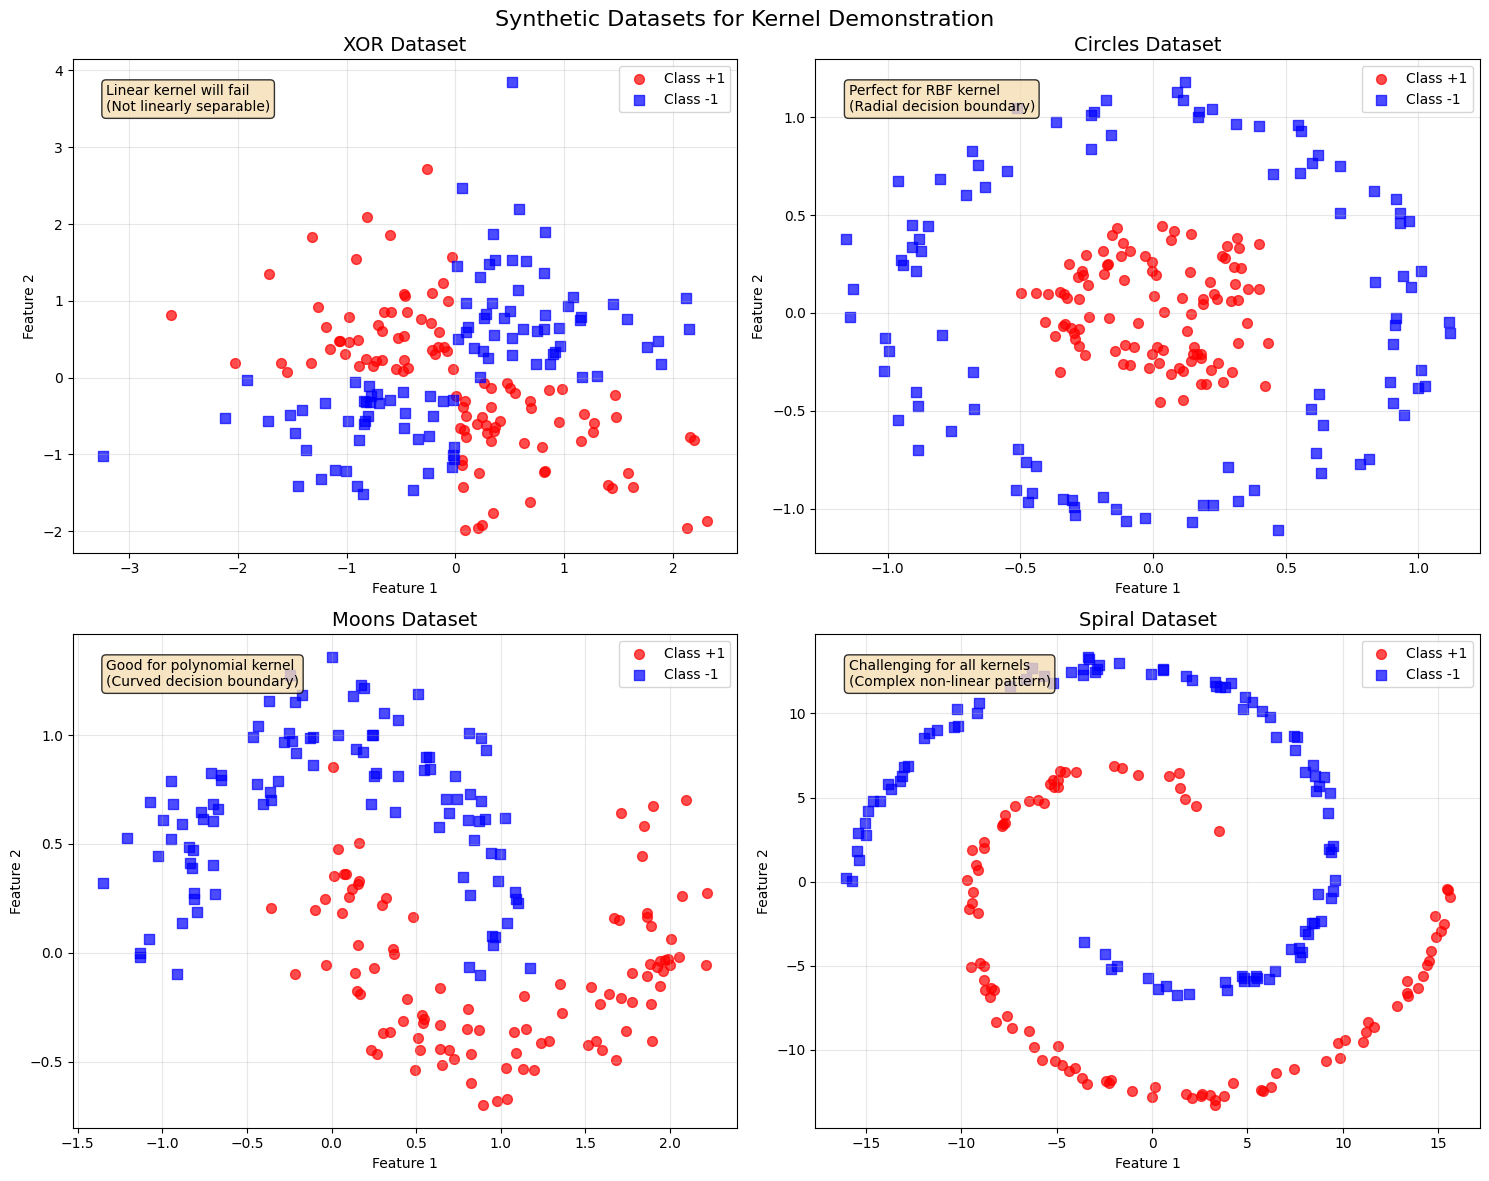

In [6]:
synthetic_datasets = create_synthetic_datasets()
visualize_synthetic_datasets(synthetic_datasets)

In [ ]:
class AdvancedKernels:
    """
    Implementation of different kernel functions for SVM.
    """
    
    @staticmethod
    def linear_kernel(x1, x2):
        """Linear kernel: K(x1, x2) = x1^T * x2"""
        # TODO: Implement linear kernel
        return
    
    @staticmethod
    def polynomial_kernel(x1, x2, degree=2, coef0=1):
        """Polynomial kernel: K(x1, x2) = (coef0 + x1^T * x2)^degree"""
        # TODO: Implement polynomial kernel
        return
    
    @staticmethod
    def rbf_kernel(x1, x2, gamma=1.0):
        """RBF (Gaussian) kernel: K(x1, x2) = exp(-gamma * ||x1 - x2||^2)"""
        if x1.ndim == 1:
            x1 = x1.reshape(1, -1)
        if x2.ndim == 1:
            x2 = x2.reshape(1, -1)
        
        from scipy.spatial.distance import cdist
        # TODO: Compute squared Euclidean distance using cdist
        sq_dists = 

        # TODO: Return the RBF kernel
        return 


In [ ]:
class AdvancedSVM(LinearSVM):
    def __init__(self, kernel='rbf', C=1.0, gamma=1.0, degree=3, 
                 learning_rate=0.01, coef0=1.0, n_epochs=100):
        """
        Initialize SimpleSVM classifier.
        
        Parameters:
        -----------
        kernel : str, default='rbf'
            Kernel type ('linear', 'poly', 'rbf')
        C : float, default=1.0
            Regularization parameter
        gamma : float, default=1.0
            Kernel coefficient for 'rbf' and 'poly'
        degree : int, default=3
            Degree for polynomial kernel
        learning_rate : float, default=0.01
            Learning rate for optimization
        n_epochs : int, default=100
            Number of training epochs
        """
        # Call parent constructor with basic SVM parameters
        super().__init__(C=C, learning_rate=learning_rate, n_epochs=n_epochs)
        
        # Add kernel-specific parameters
        self.kernel_name = kernel
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        
        if kernel == 'linear':
            self.kernel_func = AdvancedKernels.linear_kernel
        elif kernel == 'poly':
            self.kernel_func = lambda x1, x2: AdvancedKernels.polynomial_kernel(x1, x2, self.degree, self.coef0)
        elif kernel == 'rbf':
            self.kernel_func = lambda x1, x2: AdvancedKernels.rbf_kernel(x1, x2, self.gamma)
        else:
            raise ValueError(f"Unknown kernel: {kernel}")
        
    def fit(self, X, y):
        """
        Train the SVM using quadratic programming solver.
        Much more robust than manual gradient descent.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Training labels (+1 or -1)
        """
        from scipy.optimize import minimize
        
        self.X_train = X.copy()
        self.y_train = y.copy()
        n_samples = X.shape[0]
        
        # Compute kernel matrix once for efficiency
        K = self.kernel_func(X, X)
        
        print(f"Training {self.kernel_name} SVM using QP solver...")
        
        # Set up the quadratic programming problem
        # Dual objective: maximize sum(alpha_i) - 0.5 * sum_ij(alpha_i * alpha_j * y_i * y_j * K_ij)
        # This is equivalent to minimizing: 0.5 * alpha^T * P * alpha - q^T * alpha
        # where P_ij = y_i * y_j * K_ij and q_i = 1
        
        # Construct P matrix (Gram matrix weighted by labels)
        P = np.outer(y, y) * K
        q = -np.ones(n_samples)  # Negative because we're minimizing instead of maximizing
        
        # Constraints: 0 <= alpha_i <= C and sum(alpha_i * y_i) = 0
        bounds = [(0, self.C) for _ in range(n_samples)]
        
        # Equality constraint: sum(alpha_i * y_i) = 0
        constraint = {'type': 'eq', 'fun': lambda alpha: np.dot(alpha, y), 'jac': lambda alpha: y}
        
        # Objective function for minimization
        def objective(alpha):
            return 0.5 * np.dot(alpha, np.dot(P, alpha)) + np.dot(q, alpha)
        
        def objective_grad(alpha):
            return np.dot(P, alpha) + q
        
        # Initial guess
        alpha0 = np.random.uniform(0, 0.1, n_samples)
        
        # Solve the quadratic programming problem
        result = minimize(
            objective,
            alpha0,
            method='SLSQP',
            jac=objective_grad,
            bounds=bounds,
            constraints=constraint,
            options={'ftol': 1e-9, 'disp': False}
        )
        
        if result.success:
            self.alpha = result.x
            print(f"QP solver converged successfully. Objective value: {result.fun:.6f}")
        else:
            print(f"Warning: QP solver did not converge. Using best solution found.")
            self.alpha = result.x
        
        # Clean up very small alpha values (numerical precision)
        self.alpha[self.alpha < 1e-8] = 0
        
        # Compute bias term using kernel matrix
        self._compute_bias(K)
        
        # Identify support vectors
        self._identify_support_vectors()
        
        print(f"Training completed. Found {len(self.support_vectors)} support vectors.")
    
    def _compute_bias(self, K):
        """
        Compute bias term using support vectors and kernel matrix.
        Overrides parent method to work with kernels.
        Hint: For support vectors (alpha > 0), we have:
        y_i * (sum(alpha_j * y_j * K(x_j, x_i)) + b) = 1
        """
        # TODO: Find support indices (alpha > small threshold)
        small_threshold = 1e-6
        sv_indices =
        
        if len(sv_indices) == 0:
            self.b = 0
            return
        
        # Use the first support vector for simplicity
        i = sv_indices[0]
        kernel_sum = np.sum(self.alpha * self.y_train * K[i, :])
        self.b = self.y_train[i] - kernel_sum
    
    def decision_function(self, X):
        """
        Compute decision function values using kernel trick.
        Overrides parent method to work with kernels.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Test data
            
        Returns:
        --------
        decision_values : array, shape (n_samples,)
            Decision function values
            
        Hint: f(x) = sum(alpha_i * y_i * K(x, x_i)) + b
        """
        if self.X_train is None:
            raise ValueError("Model must be fitted before making predictions")
        
        # Compute kernel between test data and training data
        K_test = self.kernel_func(X, self.X_train)
        
        # TODO: Implement decision function using kernel trick
        # Use the kernel trick: f(x) = sum(alpha_i * y_i * K(x, x_i)) + b
        decision_values = 
        
        return decision_values
    
    def predict(self, X):
        """
        Make predictions on new data.
        Inherits from parent but uses overridden decision_function.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Test data
            
        Returns:
        --------
        predictions : array, shape (n_samples,)
            Predicted class labels (+1 or -1)
        """
        # TODO: Use decision_function and apply sign
        decision_values =
        # TODO: Return the sign of the decision values
        return 

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'rbf_tight']

kernel_params = {
    'linear': {},
    'poly': {'degree': 3, 'coef0': 0.1},
    'rbf': {'gamma': 0.01},
    'rbf_tight': {'gamma': 1.0}
}

optimal_gammas = {
    'XOR': {'rbf': 10.0, 'rbf_tight': 20.0},      # High gamma for sharp local regions
    'Circles': {'rbf': 5.0, 'rbf_tight': 10.0},   # High gamma for radial boundaries  
    'Moons': {'rbf': 2.0, 'rbf_tight': 5.0},      # Medium gamma for curved boundaries
    'Spiral': {'rbf': 0.1, 'rbf_tight': 1.0}      # Low gamma for global spiral patterns
}

kernel_comparison_results = compare_kernels_on_synthetic_data(AdvancedSVM, synthetic_datasets, kernels, kernel_params, optimal_gammas)

In [ ]:
plot_kernel_comparison(kernel_comparison_results, synthetic_datasets)